# 作業目標:

    使用CIFAR100, 數據集變大的影響
    
    
# 作業重點:¶

   了解 CIFAR100 跟 CIFAR10 數據及差異


In [1]:
import numpy
from keras.datasets import cifar100
import numpy as np
np.random.seed(100)

C:\Users\irvin\Anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# 資料準備

# Image normalize 

# 轉換label 為OneHot Encoding

In [3]:
(x_img_train,y_label_train), \
(x_img_test, y_label_test)=cifar100.load_data()

169009152/169001437 [==============================] - 297s 2us/step


In [4]:
print('train:',len(x_img_train))
print('test :',len(x_img_test))

train: 50000
test : 10000


In [5]:
# 查詢檔案維度資訊
x_img_train.shape

(50000, 32, 32, 3)

In [6]:
# 查詢檔案維度資訊
y_label_train.shape

(50000, 1)

In [7]:
# 查詢檔案維度資訊
x_img_test.shape

(10000, 32, 32, 3)

In [8]:
# 查詢檔案維度資訊
y_label_test.shape

(10000, 1)

In [37]:
#針對物件圖像數據集的類別編列成字典

label_dict={0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",
            5:"dog",6:"frog",7:"horse",8:"ship",9:"truck",
           10:"airplane",11:"automobile",12:"bird",13:"cat",14:"deer",
            15:"dog",16:"frog",17:"horse",18:"ship",19:"truck",
           20:"airplane",21:"automobile",22:"bird",23:"cat",24:"deer",
            25:"dog",26:"frog",27:"horse",28:"ship",29:"truck",
           30:"airplane",31:"automobile",32:"bird",33:"cat",34:"deer",
            35:"dog",36:"frog",37:"horse",38:"ship",39:"truck",
           40:"airplane",41:"automobile",42:"bird",43:"cat",44:"deer",
            45:"dog",46:"frog",47:"horse",48:"ship",49:"truck",
           50:"airplane",51:"automobile",52:"bird",53:"cat",54:"deer",
            55:"dog",56:"frog",57:"horse",58:"ship",59:"truck",
           60:"airplane",61:"automobile",62:"bird",63:"cat",64:"deer",
            65:"dog",66:"frog",67:"horse",68:"ship",69:"truck",
           70:"airplane",21:"automobile",22:"bird",23:"cat",24:"deer",
            75:"dog",76:"frog",79:"horse",78:"ship",79:"truck",
           80:"airplane",81:"automobile",82:"bird",83:"cat",84:"deer",
            85:"dog",86:"frog",87:"horse",88:"ship",89:"truck",
           90:"airplane",91:"automobile",92:"bird",93:"cat",94:"deer",
            95:"dog",96:"frog",97:"horse",98:"ship",99:"truck"}

In [38]:
#導入影像列印模組
import matplotlib.pyplot as plt

#宣告一個影像標記的函數
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx],cmap='binary')
                
        title=str(i)+','+label_dict[labels[i][0]]
        if len(prediction)>0:
            title+='=>'+label_dict[prediction[i]]
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

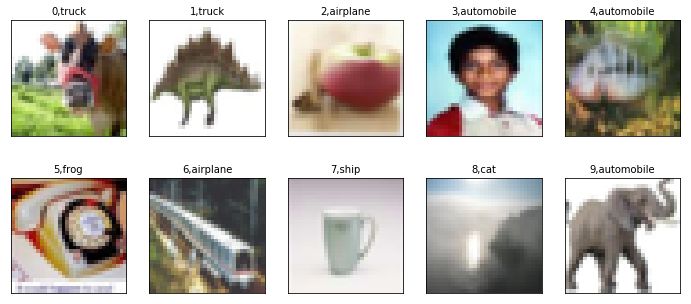

In [39]:
#針對不同的影像作標記

plot_images_labels_prediction(x_img_train,y_label_train,[],0)

In [13]:
print('x_img_test:',x_img_test.shape)
print('y_label_test :',y_label_test.shape)

x_img_test: (10000, 32, 32, 3)
y_label_test : (10000, 1)


In [14]:
x_img_train[0][0][0]

array([255, 255, 255], dtype=uint8)

In [15]:
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [16]:
x_img_train_normalize[0][0][0]

array([1., 1., 1.], dtype=float32)

In [17]:
y_label_train.shape

(50000, 1)

In [18]:
y_label_train[:5]

array([[19],
       [29],
       [ 0],
       [11],
       [ 1]])

In [19]:
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)

In [20]:
y_label_train_OneHot.shape

(50000, 100)

In [21]:
y_label_train_OneHot[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.